In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 83 Lecture 2 Assignment

In this assignment, we will learn about other optimization algorithms. We will create a neural network and try out the different optimization algorithms and compare their performance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf

tf.debugging.set_log_device_placement(True)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<IPython.core.display.Javascript object>

In [3]:
import os

tf.compat.v1.disable_eager_execution()

hello = tf.constant("Hello, TensorFlow!")

# sess = tf.compat.v1.Session()

os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # You need to tell CUDA
# which GPU you'd like to use. if you have one GPU probably your GPU is '0'with tf.device('/gpu:0'):
a = tf.constant([1.0, 2.0, 3.0, 4.0], shape=[2, 2], name="a")
b = tf.constant([4.0, 3.0, 2.0, 1.0], shape=[2, 2], name="b")
c = tf.matmul(a, b)
# with tf.compat.v1.Session() as sess:
#     print(sess.run(c))

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

[[ 8.  5.]
 [20. 13.]]


<IPython.core.display.Javascript object>

In [4]:
def build_model(
    input_dim,
    output_dim=1,
    layer_nodes=[64, 32, 32],
    activation_function="relu",
    output_function="sigmoid",
):
    model = Sequential()
    model.add(
        Dense(layer_nodes[0], input_dim=input_dim, activation=activation_function)
    )
    for i in range(1, len(layer_nodes)):
        model.add(Dense(layer_nodes[i], activation=activation_function))

    model.add(Dense(output_dim, activation=output_function))

    return model

<IPython.core.display.Javascript object>

In this assignment, we will be using the cancer data that we have worked with in previous lessons. The pre-processed data is loaded below.

In [5]:
cancer = pd.read_csv("data/cancer_processed.csv")

<IPython.core.display.Javascript object>

In [6]:
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


<IPython.core.display.Javascript object>

As you may recall, diagnosis is the target variable. One hot encode the diagnosis column.

In [7]:
# Answer below:
cancer['target'] = (cancer['diagnosis']=='M').astype(int)


<IPython.core.display.Javascript object>

Split the data into train and test with 20% of the data in test.

In [8]:
# Answer below
X = cancer.drop(['diagnosis','target'],1)
y = cancer[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


<IPython.core.display.Javascript object>

Scale all other variables using the standard scaler.

In [9]:
# Answer below:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [10]:
X.shape[1]

10

<IPython.core.display.Javascript object>

Generate a sequential model consisting of 5 layers. The layers should be of size 128, 64, 32, 32, 1. Use the appropriate activation for the output layer based on the type of prediction algorithm we are producing.

In [11]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

<IPython.core.display.Javascript object>

In [12]:
# Answer below



<IPython.core.display.Javascript object>

Initialize a SGD optimizer with learning rate 0.05 and momentum 0.9.

In [13]:
# Answer below:
sgd = SGD(learning_rate=0.05, momentum=0.9)


<IPython.core.display.Javascript object>

Compile and fit the model using the appropriate loss function and metric and use the optimizers defined above.

batch size = 100, epochs = 200

In [14]:
# Answer below:
model = build_model(
    X.shape[1],
    output_dim=y.shape[1],
    layer_nodes=[128, 64, 32, 32],
    activation_function="relu",
    output_function="sigmoid",
)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=200
)


Train on 455 samples, validate on 114 samples
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device

Epoch 1/200
100/455 [=====>........................] - ETA: 0s - loss: 0.6986 - accuracy: 0.4800WARNING:tensorflow:From C:\Users\b1t\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
455/455 [==============================] - 0s 544us/sample - loss: 0.6533 - accuracy: 0.6703 - val_loss: 0.5332 - val_accuracy: 0.8246
Epoch 2/200
455/455 [==============================] - 0s 15us/sample - loss: 0.4439 - accuracy: 0.8835 - val_loss: 0.3002 - val_accuracy: 0.8860
Epoch 3/200
455/455 [==============================] - 0s 11us/sample - loss: 0.2458 - accuracy: 0.9253 - val_l

Epoch 53/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0312 - accuracy: 0.9846 - val_loss: 0.0683 - val_accuracy: 0.9649
Epoch 54/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0253 - accuracy: 0.9912 - val_loss: 0.0961 - val_accuracy: 0.9649
Epoch 55/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0742 - val_accuracy: 0.9649
Epoch 56/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0797 - val_accuracy: 0.9561
Epoch 57/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0751 - val_accuracy: 0.9737
Epoch 58/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0212 - accuracy: 0.9912 - val_loss: 0.1162 - val_accuracy: 0.9561
Epoch 59/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0211 - accuracy: 0.9956 - val_loss: 0

455/455 [==============================] - 0s 11us/sample - loss: 0.0160 - accuracy: 0.9934 - val_loss: 0.2527 - val_accuracy: 0.9474
Epoch 109/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0266 - accuracy: 0.9912 - val_loss: 0.0933 - val_accuracy: 0.9737
Epoch 110/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0100 - accuracy: 0.9956 - val_loss: 0.1324 - val_accuracy: 0.9649
Epoch 111/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0222 - accuracy: 0.9956 - val_loss: 0.1142 - val_accuracy: 0.9561
Epoch 112/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0308 - accuracy: 0.9890 - val_loss: 0.1477 - val_accuracy: 0.9737
Epoch 113/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0168 - accuracy: 0.9934 - val_loss: 0.0684 - val_accuracy: 0.9825
Epoch 114/200
455/455 [==============================] - 0s 15us/sample - loss: 0.0167 - accuracy: 0.9956 - val_loss: 0.0985 -

455/455 [==============================] - 0s 11us/sample - loss: 0.0141 - accuracy: 0.9978 - val_loss: 0.0663 - val_accuracy: 0.9649
Epoch 164/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0123 - accuracy: 0.9978 - val_loss: 0.0797 - val_accuracy: 0.9561
Epoch 165/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0729 - val_accuracy: 0.9649
Epoch 166/200
455/455 [==============================] - 0s 15us/sample - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9649
Epoch 167/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0856 - val_accuracy: 0.9649
Epoch 168/200
455/455 [==============================] - 0s 15us/sample - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9649
Epoch 169/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0960 -

<IPython.core.display.Javascript object>

<AxesSubplot:>

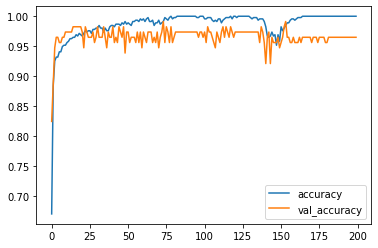

<IPython.core.display.Javascript object>

In [15]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()

Define the RMSprop optimizer with a learning rate of 0.05.

In [16]:
# Answer below:
rms = RMSprop(learning_rate=0.05)


<IPython.core.display.Javascript object>

Compile and fit the model using the optimizer defined above. What do you notice about the accuracy?

In [17]:
# Answer below:
model = build_model(X.shape[1], output_dim=y.shape[1], layer_nodes=[128,64,32,32], activation_function='relu', output_function='sigmoid')
model.compile(loss='binary_crossentropy',optimizer=rms, metrics=['accuracy'] )
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=200)


Train on 455 samples, validate on 114 samples
Epoch 1/200
455/455 [==============================] - 1s 1ms/sample - loss: 5.2544 - accuracy: 0.5187 - val_loss: 1.9714 - val_accuracy: 0.6667
Epoch 2/200
455/455 [==============================] - 0s 13us/sample - loss: 6.0561 - accuracy: 0.4505 - val_loss: 0.5660 - val_accuracy: 0.6579
Epoch 3/200
455/455 [==============================] - 0s 13us/sample - loss: 1.4711 - accuracy: 0.7363 - val_loss: 0.1907 - val_accuracy: 0.9035
Epoch 4/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1832 - accuracy: 0.9319 - val_loss: 0.1801 - val_accuracy: 0.9386
Epoch 5/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1625 - accuracy: 0.9363 - val_loss: 0.2175 - val_accuracy: 0.9035
Epoch 6/200
455/455 [==============================] - 0s 15us/sample - loss: 0.1951 - accuracy: 0.9253 - val_loss: 0.1473 - val_accuracy: 0.9474
Epoch 7/200
455/455 [==============================] - 0s 13us/sample - loss: 0

455/455 [==============================] - 0s 13us/sample - loss: 0.2506 - accuracy: 0.9297 - val_loss: 0.1013 - val_accuracy: 0.9649
Epoch 57/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0873 - accuracy: 0.9714 - val_loss: 0.1978 - val_accuracy: 0.9474
Epoch 58/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0605 - accuracy: 0.9736 - val_loss: 0.1250 - val_accuracy: 0.9649
Epoch 59/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0453 - accuracy: 0.9736 - val_loss: 0.1111 - val_accuracy: 0.9123
Epoch 60/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0560 - accuracy: 0.9692 - val_loss: 0.1758 - val_accuracy: 0.9649
Epoch 61/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0588 - accuracy: 0.9714 - val_loss: 0.0514 - val_accuracy: 0.9649
Epoch 62/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0415 - accuracy: 0.9802 - val_loss: 0.1757 - val_a

455/455 [==============================] - 0s 11us/sample - loss: 0.0362 - accuracy: 0.9824 - val_loss: 0.1970 - val_accuracy: 0.9561
Epoch 112/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0369 - accuracy: 0.9824 - val_loss: 0.2083 - val_accuracy: 0.9561
Epoch 113/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0305 - accuracy: 0.9868 - val_loss: 0.2335 - val_accuracy: 0.9561
Epoch 114/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0282 - accuracy: 0.9868 - val_loss: 0.3760 - val_accuracy: 0.9561
Epoch 115/200
455/455 [==============================] - 0s 15us/sample - loss: 0.1742 - accuracy: 0.9758 - val_loss: 1.0085 - val_accuracy: 0.9298
Epoch 116/200
455/455 [==============================] - 0s 11us/sample - loss: 0.3395 - accuracy: 0.9648 - val_loss: 0.2195 - val_accuracy: 0.9561
Epoch 117/200
455/455 [==============================] - 0s 15us/sample - loss: 0.1751 - accuracy: 0.9714 - val_loss: 0.2112 -

455/455 [==============================] - 0s 18us/sample - loss: 0.0300 - accuracy: 0.9868 - val_loss: 0.1779 - val_accuracy: 0.9649
Epoch 167/200
455/455 [==============================] - 0s 18us/sample - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.2090 - val_accuracy: 0.9649
Epoch 168/200
455/455 [==============================] - 0s 15us/sample - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.2030 - val_accuracy: 0.9649
Epoch 169/200
455/455 [==============================] - 0s 15us/sample - loss: 0.0181 - accuracy: 0.9934 - val_loss: 0.1963 - val_accuracy: 0.9649
Epoch 170/200
455/455 [==============================] - 0s 22us/sample - loss: 0.0229 - accuracy: 0.9912 - val_loss: 0.2057 - val_accuracy: 0.9561
Epoch 171/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0229 - accuracy: 0.9912 - val_loss: 0.2165 - val_accuracy: 0.9649
Epoch 172/200
455/455 [==============================] - 0s 15us/sample - loss: 0.0178 - accuracy: 0.9934 - val_loss: 0.2947 -

<IPython.core.display.Javascript object>

<AxesSubplot:>

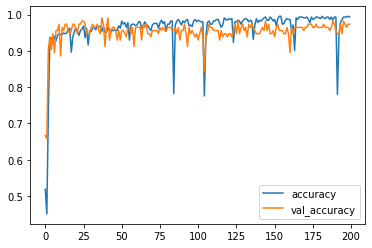

<IPython.core.display.Javascript object>

In [18]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()

Define the Adam optimizer with learning rate 0.01

In [19]:
# Answer below:
adam = Adam(learning_rate=0.01)


<IPython.core.display.Javascript object>

Compile and fit the model using the optimizer defined above. How does the peformance differ with this optimizer?

In [20]:
# Answer below:
model = build_model(
    X.shape[1],
    output_dim=y.shape[1],
    layer_nodes=[128, 64, 32, 32],
    activation_function="relu",
    output_function="sigmoid",
)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=200
)

Train on 455 samples, validate on 114 samples
Epoch 1/200
455/455 [==============================] - 1s 2ms/sample - loss: 0.4192 - accuracy: 0.8571 - val_loss: 0.1517 - val_accuracy: 0.9474
Epoch 2/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1965 - accuracy: 0.9209 - val_loss: 0.1140 - val_accuracy: 0.9561
Epoch 3/200
455/455 [==============================] - 0s 15us/sample - loss: 0.1262 - accuracy: 0.9582 - val_loss: 0.0936 - val_accuracy: 0.9912
Epoch 4/200
455/455 [==============================] - 0s 11us/sample - loss: 0.1189 - accuracy: 0.9582 - val_loss: 0.1342 - val_accuracy: 0.9912
Epoch 5/200
455/455 [==============================] - 0s 15us/sample - loss: 0.1024 - accuracy: 0.9582 - val_loss: 0.1157 - val_accuracy: 0.9649
Epoch 6/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0993 - accuracy: 0.9560 - val_loss: 0.1440 - val_accuracy: 0.9737
Epoch 7/200
455/455 [==============================] - 0s 13us/sample - loss: 0

455/455 [==============================] - 0s 11us/sample - loss: 0.0152 - accuracy: 0.9956 - val_loss: 0.1217 - val_accuracy: 0.9561
Epoch 57/200
455/455 [==============================] - 0s 14us/sample - loss: 0.0084 - accuracy: 0.9956 - val_loss: 0.1934 - val_accuracy: 0.9561
Epoch 58/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0173 - accuracy: 0.9912 - val_loss: 0.1785 - val_accuracy: 0.9561
Epoch 59/200
455/455 [==============================] - 0s 15us/sample - loss: 0.0155 - accuracy: 0.9912 - val_loss: 0.1001 - val_accuracy: 0.9737
Epoch 60/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0108 - accuracy: 0.9912 - val_loss: 0.1027 - val_accuracy: 0.9737
Epoch 61/200
455/455 [==============================] - 0s 15us/sample - loss: 0.0107 - accuracy: 0.9934 - val_loss: 0.1234 - val_accuracy: 0.9825
Epoch 62/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0087 - accuracy: 0.9934 - val_loss: 0.1633 - val_a

Epoch 112/200
455/455 [==============================] - 0s 11us/sample - loss: 0.0308 - accuracy: 0.9912 - val_loss: 0.0582 - val_accuracy: 0.9737
Epoch 113/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0218 - accuracy: 0.9890 - val_loss: 0.0626 - val_accuracy: 0.9737
Epoch 114/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0166 - accuracy: 0.9912 - val_loss: 0.0653 - val_accuracy: 0.9737
Epoch 115/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0112 - accuracy: 0.9956 - val_loss: 0.0719 - val_accuracy: 0.9737
Epoch 116/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0085 - accuracy: 0.9956 - val_loss: 0.0804 - val_accuracy: 0.9737
Epoch 117/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0897 - val_accuracy: 0.9737
Epoch 118/200
455/455 [==============================] - 0s 15us/sample - loss: 0.0096 - accuracy: 0.9978 - val_

455/455 [==============================] - 0s 15us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1729 - val_accuracy: 0.9737
Epoch 168/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1740 - val_accuracy: 0.9737
Epoch 169/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1746 - val_accuracy: 0.9737
Epoch 170/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1753 - val_accuracy: 0.9737
Epoch 171/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1759 - val_accuracy: 0.9737
Epoch 172/200
455/455 [==============================] - 0s 13us/sample - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1765 - val_accuracy: 0.9737
Epoch 173/200
455/455 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 1.00 - 0s 11us/sample - loss: 0.00

<IPython.core.display.Javascript object>

<AxesSubplot:>

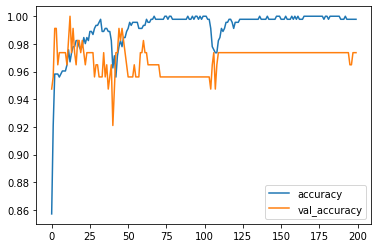

<IPython.core.display.Javascript object>

In [21]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()

Now change the learning rate to 0.1 in your Adam optimizer and compare the results (both speed and accuracy).

In [22]:
# Answer below:

adam = Adam(learning_rate=0.1)

<IPython.core.display.Javascript object>

In [23]:
model = build_model(
    X.shape[1],
    output_dim=y.shape[1],
    layer_nodes=[128, 64, 32, 32],
    activation_function="relu",
    output_function="sigmoid",
)

model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=100, epochs=200
)

Train on 455 samples, validate on 114 samples
Epoch 1/200
455/455 [==============================] - 1s 2ms/sample - loss: 5.6237 - accuracy: 0.4637 - val_loss: 9.7083 - val_accuracy: 0.3333
Epoch 2/200
455/455 [==============================] - 0s 15us/sample - loss: 5.6744 - accuracy: 0.5495 - val_loss: 3.9758 - val_accuracy: 0.6667
Epoch 3/200
455/455 [==============================] - 0s 13us/sample - loss: 4.0844 - accuracy: 0.5407 - val_loss: 1.4129 - val_accuracy: 0.8333
Epoch 4/200
455/455 [==============================] - 0s 15us/sample - loss: 1.1695 - accuracy: 0.8527 - val_loss: 1.6418 - val_accuracy: 0.7105
Epoch 5/200
455/455 [==============================] - 0s 15us/sample - loss: 0.9608 - accuracy: 0.8308 - val_loss: 1.0253 - val_accuracy: 0.9035
Epoch 6/200
455/455 [==============================] - 0s 15us/sample - loss: 0.7053 - accuracy: 0.9033 - val_loss: 0.4870 - val_accuracy: 0.8772
Epoch 7/200
455/455 [==============================] - 0s 13us/sample - loss: 0

455/455 [==============================] - 0s 15us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4331 - val_accuracy: 0.9386
Epoch 57/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4330 - val_accuracy: 0.9386
Epoch 58/200
455/455 [==============================] - 0s 15us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4329 - val_accuracy: 0.9386
Epoch 59/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4328 - val_accuracy: 0.9386
Epoch 60/200
455/455 [==============================] - 0s 15us/sample - loss: 0.1892 - accuracy: 0.9560 - val_loss: 0.4328 - val_accuracy: 0.9386
Epoch 61/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4328 - val_accuracy: 0.9386
Epoch 62/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4327 - val_a

Epoch 112/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1892 - accuracy: 0.9560 - val_loss: 0.4321 - val_accuracy: 0.9386
Epoch 113/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4321 - val_accuracy: 0.9386
Epoch 114/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1892 - accuracy: 0.9560 - val_loss: 0.4321 - val_accuracy: 0.9386
Epoch 115/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1892 - accuracy: 0.9560 - val_loss: 0.4321 - val_accuracy: 0.9386
Epoch 116/200
455/455 [==============================] - 0s 15us/sample - loss: 0.1892 - accuracy: 0.9560 - val_loss: 0.4321 - val_accuracy: 0.9386
Epoch 117/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1892 - accuracy: 0.9560 - val_loss: 0.4321 - val_accuracy: 0.9386
Epoch 118/200
455/455 [==============================] - 0s 15us/sample - loss: 0.1892 - accuracy: 0.9560 - val_

455/455 [==============================] - 0s 15us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4319 - val_accuracy: 0.9386
Epoch 168/200
455/455 [==============================] - 0s 18us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4319 - val_accuracy: 0.9386
Epoch 169/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4318 - val_accuracy: 0.9386
Epoch 170/200
455/455 [==============================] - 0s 15us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4318 - val_accuracy: 0.9386
Epoch 171/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1892 - accuracy: 0.9560 - val_loss: 0.4318 - val_accuracy: 0.9386
Epoch 172/200
455/455 [==============================] - 0s 11us/sample - loss: 0.1893 - accuracy: 0.9560 - val_loss: 0.4318 - val_accuracy: 0.9386
Epoch 173/200
455/455 [==============================] - 0s 13us/sample - loss: 0.1892 - accuracy: 0.9560 - val_loss: 0.4318 -

<IPython.core.display.Javascript object>

<AxesSubplot:>

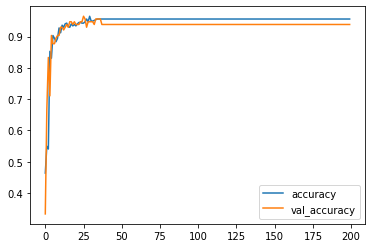

<IPython.core.display.Javascript object>

In [24]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()